In [1]:
from google.colab import files 
uploaded = files.upload()

Saving problem2_dataset.csv to problem2_dataset.csv


In [2]:
#importing the dataset
import pandas as pd
data=pd.read_csv("problem2_dataset.csv", header=None)

In [77]:
data.head(30)

,0,1,2
0,10.600000,20.000000,2.000000
1,10.761219,20.020999,2.992447
2,10.912837,20.023995,3.943493
3,11.054800,20.009001,4.815118
4,11.187063,19.976045,5.572398
5,11.309591,19.925172,6.184897
6,11.422354,19.856442,6.627883
7,11.525336,19.769933,6.883310
8,11.618524,19.665737,6.940544
9,11.701917,19.543962,6.796780


In [3]:
data.shape

(750, 3)

In [6]:
#separing data of 3 sensors into 3 data frame
sensor1=data[0]
sensor2=data[1]
sensor3=data[2]

In [81]:
sensor1.shape

(750, 1)

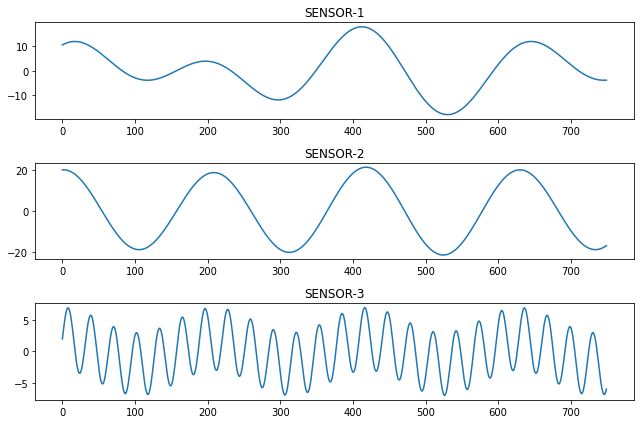

In [8]:
#Plotting 3 sensors data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
plt.subplot(3, 1, 1)
plt.plot(sensor1)
plt.title("SENSOR-1")
plt.subplot(3, 1, 2)
plt.plot(sensor2)
plt.title("SENSOR-2")
plt.subplot(3, 1, 3)
plt.plot(sensor3)
plt.title("SENSOR-3")
plt.tight_layout()
plt.show()

# ..................SENSOR_1................

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
sensor1=scaler.fit_transform(np.array(sensor1).reshape(-1,1))

In [82]:
# splitting dataset into train and test based on time
training_size=int(len(sensor1)*0.65)
test_size=len(sensor1)-training_size
train_data,test_data=sensor1[0:training_size,:],sensor1[training_size:len(sensor1),:1]

In [11]:
train_data.shape,test_data.shape

((487, 1), (263, 1))

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
X_train.shape,X_test.shape

((386, 100), (162, 100))

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [155]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [139]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 269ms/step - loss: 0.1224 - val_loss: 0.0459
Epoch 2/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0264 - val_loss: 0.0237
Epoch 3/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0136 - val_loss: 0.0088
Epoch 4/100
7/7 [==============================] - 1s 155ms/step - loss: 0.0093 - val_loss: 0.0104
Epoch 5/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0099 - val_loss: 0.0051
Epoch 6/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 7/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 8/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 9/100
7/7 [==============================] - 1s 132ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 10/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 11/

In [20]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8.463222351451238

In [23]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

7.017436028740703

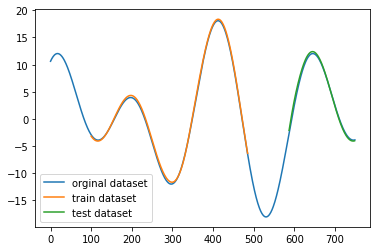

In [24]:
# Plotting 
# shift train predictions for plotting
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = np.empty_like(sensor1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(sensor1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(sensor1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(sensor1),label="orginal dataset")
plt.plot(trainPredictPlot,label="train dataset")
plt.plot(testPredictPlot,label="test dataset")
plt.legend()
plt.show()

In [26]:
len(test_data)

263

In [27]:
x_input=test_data[163:].reshape(1,-1)# storing previous 100 sensor1 value for future prediction
x_input.shape

(1, 100)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [29]:
len(temp_input)

100

In [30]:
# demonstrate prediction for next 500 values
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<500):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[0.3892833888530731], [0.3902713358402252], [0.3913261890411377], [0.3924379348754883], [0.39361101388931274], [0.3948577046394348], [0.39619335532188416], [0.3976336419582367], [0.399191677570343], [0.4008784592151642], [0.4027014970779419], [0.4046659767627716], [0.4067745804786682], [0.4090283215045929], [0.41142699122428894], [0.4139694273471832], [0.41665399074554443], [0.4194788336753845], [0.42244184017181396], [0.42554107308387756], [0.4287744164466858], [0.4321398437023163], [0.43563538789749146], [0.43925920128822327], [0.44300901889801025], [0.44688308238983154], [0.45087897777557373], [0.45499467849731445], [0.4592275321483612], [0.46357542276382446], [0.46803560853004456], [0.47260531783103943], [0.4772818982601166], [0.4820622503757477], [0.4869433343410492], [0.491921991109848], [0.49699485301971436], [0.5021584033966064], [0.5074090957641602], [0.5127432346343994], [0.5181571245193481], [0.5236467123031616], [0.5292078852653503], [0.5348367094993591], [0.54052895307540

In [38]:
len(lst_output)

500

In [68]:
arr = np.array(lst_output)

In [32]:
day_new=np.arange(1,751)
day_pred=np.arange(751,1251)

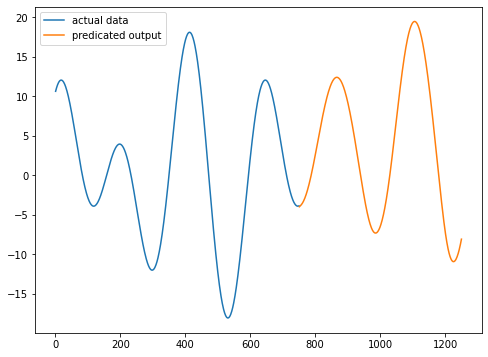

In [76]:
plt.figure(figsize=(8,6))
plt.plot(day_new,scaler.inverse_transform(sensor1),label="actual data")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="predicated output")
plt.legend()

In [47]:
df_500 =pd.DataFrame()
col_names =  ['s1', 's2', 's3'] 
df_500 = pd.DataFrame(columns = col_names) 

In [ ]:
df_500["s1"]=scaler.inverse_transform(arr)

#.................SENSOR_2............

In [83]:
sensor2=scaler.fit_transform(np.array(sensor2).reshape(-1,1))

In [84]:
training_size=int(len(sensor2)*0.65)
test_size=len(sensor2)-training_size
train_data,test_data=sensor2[0:training_size,:],sensor2[training_size:len(sensor2),:1]

In [85]:
train_data.shape,test_data.shape

((487, 1), (263, 1))

In [86]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [87]:
X_train.shape,X_test.shape

((386, 100), (162, 100))

In [88]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 143ms/step - loss: 1.4902e-04 - val_loss: 3.5925e-04
Epoch 2/100
7/7 [==============================] - 1s 138ms/step - loss: 1.7689e-04 - val_loss: 1.1257e-04
Epoch 3/100
7/7 [==============================] - 1s 139ms/step - loss: 7.6898e-05 - val_loss: 1.8730e-04
Epoch 4/100
7/7 [==============================] - 1s 138ms/step - loss: 9.4780e-05 - val_loss: 1.1404e-04
Epoch 5/100
7/7 [==============================] - 1s 160ms/step - loss: 6.8265e-05 - val_loss: 2.8306e-05
Epoch 6/100
7/7 [==============================] - 1s 161ms/step - loss: 6.2248e-05 - val_loss: 1.0649e-04
Epoch 7/100
7/7 [==============================] - 1s 151ms/step - loss: 4.9206e-05 - val_loss: 1.3188e-05
Epoch 8/100
7/7 [==============================] - 1s 146ms/step - loss: 1.4668e-05 - val_loss: 6.8532e-05
Epoch 9/100
7/7 [==============================] - 1s 147ms/step - loss: 3.0809e-05 - val_loss: 7.0779e-06
Epoch 10/100
7/7 [===================

In [90]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [92]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13.529305407118098

In [93]:
math.sqrt(mean_squared_error(ytest,test_predict))

14.243432538287246

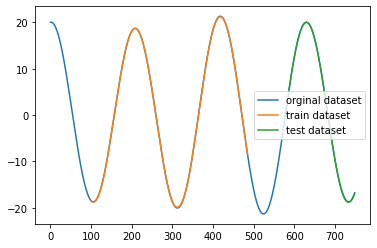

In [96]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = np.empty_like(sensor2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(sensor2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(sensor2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(sensor2),label="orginal dataset")
plt.plot(trainPredictPlot,label="train dataset")
plt.plot(testPredictPlot,label="test dataset")
plt.legend()
plt.show()

In [97]:
x_input=test_data[163:].reshape(1,-1)# storing previous 100 sensor1 value for future prediction
x_input.shape


(1, 100)

In [98]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [99]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<500):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[0.11081498861312866], [0.11710762232542038], [0.12370731681585312], [0.13060131669044495], [0.13778342306613922], [0.14525166153907776], [0.15300637483596802], [0.16104862093925476], [0.16937944293022156], [0.17799915373325348], [0.18690705299377441], [0.1961013525724411], [0.20557916164398193], [0.21533656120300293], [0.2253684401512146], [0.23566873371601105], [0.2462306022644043], [0.25704583525657654], [0.2681055963039398], [0.27939969301223755], [0.29091712832450867], [0.3026457130908966], [0.3145720958709717], [0.32668209075927734], [0.3389604687690735], [0.35139110684394836], [0.36395755410194397], [0.37664252519607544], [0.3894287943840027], [0.402299165725708], [0.4152365028858185], [0.42822447419166565], [0.44124728441238403], [0.4542900323867798], [0.46733856201171875], [0.48038002848625183], [0.4934023916721344], [0.5063944458961487], [0.5193458795547485], [0.5322469472885132], [0.5450885891914368], [0.5578620433807373], [0.570558488368988], [0.58316969871521], [0.5956872

In [100]:
arr = np.array(lst_output)
day_new=np.arange(1,751)
day_pred=np.arange(751,1251)

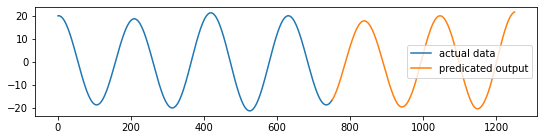

In [107]:
plt.figure(figsize=(9,2))
plt.plot(day_new,scaler.inverse_transform(sensor2),label="actual data")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="predicated output")
plt.legend()

In [104]:
df_500["s2"]=scaler.inverse_transform(arr)

In [105]:
df_500

,s1,s2,s3
0,-3.999953,-16.581890,NaN
1,-3.964260,-16.313770,NaN
2,-3.926150,-16.032566,NaN
3,-3.885984,-15.738822,NaN
4,-3.843603,-15.432802,NaN
...,...,...,...
495,-8.922503,21.272218,NaN
496,-8.728823,21.396730,NaN
497,-8.526852,21.501415,NaN
498,-8.316611,21.586256,NaN


# ..............SENSOR_3................

In [156]:
sensor3=scaler.fit_transform(np.array(sensor3).reshape(-1,1))

In [157]:
training_size=int(len(sensor3)*0.65)
test_size=len(sensor3)-training_size
train_data,test_data=sensor3[0:training_size,:],sensor3[training_size:len(sensor3),:1]

In [158]:
train_data.shape,test_data.shape

((487, 1), (263, 1))

In [159]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [160]:
X_train.shape,X_test.shape

((386, 100), (162, 100))

In [161]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [162]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 293ms/step - loss: 0.1847 - val_loss: 0.2666
Epoch 2/100
7/7 [==============================] - 1s 159ms/step - loss: 0.1524 - val_loss: 0.0945
Epoch 3/100
7/7 [==============================] - 1s 160ms/step - loss: 0.1068 - val_loss: 0.1009
Epoch 4/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0889 - val_loss: 0.0827
Epoch 5/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0830 - val_loss: 0.0893
Epoch 6/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0744 - val_loss: 0.0725
Epoch 7/100
7/7 [==============================] - 1s 161ms/step - loss: 0.0672 - val_loss: 0.0674
Epoch 8/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0611 - val_loss: 0.0595
Epoch 9/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0511 - val_loss: 0.0453
Epoch 10/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0316 - val_loss: 0.0157
Epoch 11/

In [163]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [164]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [165]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.010883133005367543

In [166]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.010978203316254879

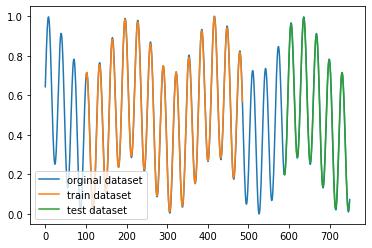

In [167]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = np.empty_like(sensor3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(sensor3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(sensor3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(sensor3),label="orginal dataset")
plt.plot(trainPredictPlot,label="train dataset")
plt.plot(testPredictPlot,label="test dataset")
plt.legend()
plt.show()

In [168]:
x_input=test_data[163:].reshape(1,-1)# storing previous 100 sensor1 value for future prediction
x_input.shape


(1, 100)

In [169]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [170]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<500):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[0.13617843389511108], [0.1910005360841751], [0.25345876812934875], [0.321749746799469], [0.3936132490634918], [0.46632352471351624], [0.5368176698684692], [0.6019489169120789], [0.6587609648704529], [0.704701840877533], [0.7377766966819763], [0.7566714882850647], [0.7608190178871155], [0.7503803968429565], [0.7261508703231812], [0.6894415616989136], [0.6419532895088196], [0.58566814661026], [0.5227778553962708], [0.45566511154174805], [0.38692548871040344], [0.3193894922733307], [0.2560808062553406], [0.20006094872951508], [0.15415312349796295], [0.12062100321054459], [0.1009209156036377], [0.0956215038895607], [0.10450156033039093], [0.12676091492176056], [0.1612568199634552], [0.20668433606624603], [0.26165348291397095], [0.3246462345123291], [0.3938814699649811], [0.4671599566936493], [0.5418001413345337], [0.6147444248199463], [0.6828131079673767], [0.742982804775238], [0.7925916314125061], [0.8294855952262878], [0.8521546721458435], [0.8598354458808899], [0.8525224328041077], [0

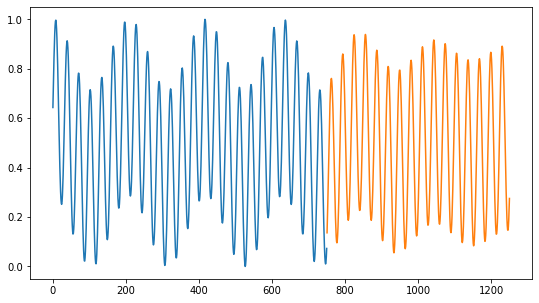

In [171]:
plt.figure(figsize=(9,5))
plt.plot(day_new,scaler.inverse_transform(sensor3),label="actual data")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="predicated output")
plt.legend()